In [1]:
import gym
import numpy as np
import pandas as pd
from matplotlib import style, pyplot as plt

style.use('ggplot')

### CliffWalking Demo

We'll have a quick demo of the cliffwalking environment before making our SARSA algorithm.

Functions used in the cell below:
- `env = gym.make(env_name)` : creates a gym environment using the specified environment name.
- `env.render()`: visualizes your environment
- `env.step(action)`: implements the given `action` in the environment. `action` must be part of `env.action_space`.
    - every step, the environment generates the following output:<br>
    `observation, reward, done, info = env.step(action)`

Below, we perform 5 random actions in the environment and print the relevant output. Some things to note:
- *observation*: The cell we move to.
- *reward*: When the agent steps onto the cliff, the reward is -100. Any other outcome has a reward of -1.<br>We want to maximize this reward (keep it as close to 0 as possible).
- *done*: This will only be true when we reach the target "T".

In [2]:
# Make the cliffwalking env using gym
env = gym.make('CliffWalking-v0')

map_action2dir = {0: 'up', 1:'right', 2:'down', 3:'left'}

# Reset and show initial position
env.reset()
print('Initial position')
env.render()

# Do 5 random actions
for i in range(5):
    action = env.action_space.sample()
    print('Random step {} : {}'.format(i+1, map_action2dir[action]))
    out = env.step(action) # take a random action
    print('observation: {}, reward: {}, done: {}'.format(*out))
    env.render()

Initial position
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Random step 1 : right
observation: 36, reward: -100, done: False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Random step 2 : up
observation: 24, reward: -1, done: False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Random step 3 : right
observation: 25, reward: -1, done: False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Random step 4 : down
observation: 36, reward: -100, done: False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Random step 5 : right
obse

### SARSA Algorithm

Below, we set up our agent, its method to update the Q-matrix, and its method to choose an action.<br>We also define a function to run the algorithm ang generate rewards.

In [3]:
class SarsaAgent:
    """
    Uses the `Agent` base class. Implements SARSA to find a near-optimal policy.
    """
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Parameters:
            epsilon: The degree of exploration. Between [0,1].
            alpha: The learning rate.
            gamma: The discount factor. Between [0,1].
            num_state: The number of states.
            num_actions: The number of actions.
            action_space: The environment's action space.
        """
        # Set all attributes
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
        self.action_space = action_space
        
        # Create Q matrix based on states and actions.
        # Q[s,a] calls a specific cell in the matrix.
        self.Q = np.zeros((self.num_state, self.num_actions))
        
    def reset_Q(self):
        self.Q = np.zeros((self.num_state, self.num_actions))

    def update(self, state, action, reward, next_state, next_action): 
        """
        Update our Q-matrix using SARSA.
        Q[S, A] = Q[S, A] + alpha(R + (gamma * Q[S', A'] - Q[S, A])
        Parameters:
            state: The current state
            action: the current action
            reward: The reward for taking `action` from `state`
            next_state: The next state
            next_action: The next action
        Returns:
            None
        """
        predict = self.Q[state, action]
        target = reward + self.gamma * self.Q[next_state, next_action]
        self.Q[state, action] += self.alpha * (target - predict)
        
    def epsilon_greedy_choice(self, state): 
        """
        Implement epsilon-greedy action choice.
        Based on our epsilon value, we will either:
        1) Choose a random action (exploration)
        2) Choose the greedy aciton based on our
        Q-matrix (exploitation)
        """
        action = 0
        # exploration
        if np.random.uniform(0, 1) < self.epsilon: 
            action = self.action_space.sample()
        # exploitation
        else:
            action = np.argmax(self.Q[state, :]) 
        return action
    
    def sarsa_iteration(self, env, state1, action1, epsilon, 
                        max_steps, alpha, gamma):
        """
        Iterate once for the SARSA algorithm.
        """
        # Take an action and get the output
        state2, reward, done, _ = env.step(action1) 

        # Choose the next action via epsilon-greedy policy
        action2 = agent.epsilon_greedy_choice(state2) 

        # Update the Q-matrix
        agent.update(state1, action1, reward, state2, action2) 

        state1 = state2 
        action1 = action2 
        return state1, action1, reward, done
        
    
    def run(self, env, epsilon=0.1, total_episodes=1000,
            max_steps=100, alpha=0.05, gamma=0.95, epsilon_decay=False):
        """
        Run the SARSA agent.

        Parameters:
            env: The environment.
            total_episodes: The number of episodes to run
        """
        # Storage for episode rewards
        totalReward = []

        # Run all episodes, appl|ying the SARSA algorithm
        for _ in range(total_episodes):
            # Initialize
            t = 0
            state1 = env.reset() 
            action1 = agent.epsilon_greedy_choice(state1) 
            episodeReward = 0
            while t < max_steps:
                # Do one iteration
                state1, action1, reward, done = agent.sarsa_iteration(
                    env, state1, action1, epsilon, max_steps, alpha, gamma
                )
                
                # Update iters
                t += 1
                episodeReward += reward

                # Break if the target location is reached 
                if done: 
                    break
                # Whether or not to decay epsilon
                if epsilon_decay:
                    if t%100:
                        agent.epsilon /= 2
            # Append the sum of reward at the end of the episode
            totalReward.append(episodeReward)
        env.close()
        return totalReward

We also set up a plotting function.

In [12]:
def plot_mean_reward(x, title):
    plt.subplots(figsize=(8,5), dpi=75)
    plt.plot(x.rolling(10).mean())
    plt.ylim(-300,0)
    plt.xlabel('Episode')
    plt.ylabel('Mean reward')
    plt.title(title, fontsize=12)

Now, generate two runs of the SARSA algorithm.
1. The first uses epsilon-decay. This basically discourages exploration the more episodes are done.<br>This yields a smoother reward curve, and is frequently done in advanced algorithms.
2. The second does not use epsilon-decay. The plot for this is more erratic because even when the algorithm is 'smart',<br>it can still make 'stupid' random mistakes.

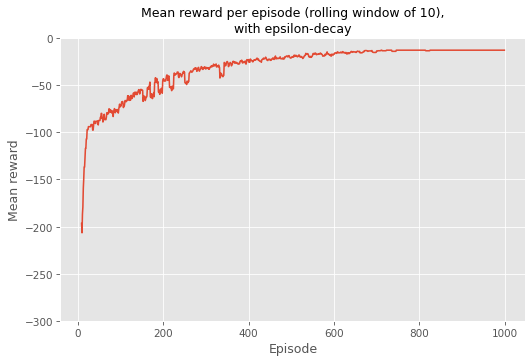

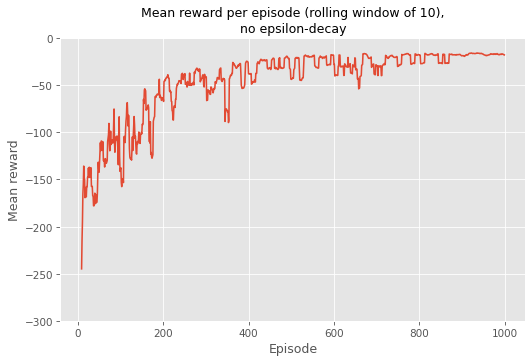

In [13]:
# Define all required parameters
epsilon = 0.1
total_episodes = 1000
max_steps = 100
alpha = 0.05
gamma = 0.95

# Define agent
agent = SarsaAgent(
    epsilon, alpha, gamma, env.observation_space.n, 
    env.action_space.n, env.action_space
)

# Get results with and without epsilon decay
rewards_w_decay = pd.Series(
    agent.run(env, epsilon_decay=True)
)
agent.epsilon = epsilon # reset epsilon
agent.reset_Q() # reset Q matrix
rewards_no_decay = pd.Series(
    agent.run(env, epsilon_decay=False)
)

plot_mean_reward(
    rewards_w_decay, 
    title='Mean reward per episode (rolling window of 10),\nwith epsilon-decay'
)

plot_mean_reward(
    rewards_no_decay, 
    title='Mean reward per episode (rolling window of 10),\nno epsilon-decay'
)

plt.show()